<center>
    <h1>Identifying the Human Values behind Arguments</h1>
    <h1>01 - Dataset Analysis</h1>
    <h2>Natural Language Processing</h2>
    <h3>Antonio Politano, Enrico Pittini, Riccardo Spolaor and Samuele Bortolato</h3>
    <h4>antonio.politano2@studio.unibo.it, enrico.pittini@studio.unibo.it, riccardo.spolaor@studio.unibo.it, samuele.bortolato@studio.unibo.it</h4>
</center>

---

In this notebook the analysis on the datasets for the *Identifying the Human Values behind Arguments* task is addressed.

For more detailed informations about the used functions, look into the corresponding docstrings inside the python files, inside the `src` folder.

In [102]:
# Settings for autoreloading.

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [103]:
# Settings for reproducibility.

from src.utils.seeder import set_random_seed

SEED = 42
set_random_seed(SEED)

## Download of the Dataset

The dataset is given as already split into train and test. In particular, these two datasets are divided into:
* The `arguments` set, which contains instances expressing a position on a specific argument. They are represented as follows:
    * An argument *premise*.
    * The *stance* regarding the argument (either *in favor* or *against*).
    * The *conclusion* on the topic.
* The respective `labels` set, which is comprised of a *multi-label* vector specifying which *Human Values* are related to the correspomnding argument. Hence an argument can refer to more than one *Human Value*. The total number of considered *Human Value* labels is $20$.

In [104]:
from src.datasets.dataset_builder import get_dataframes

arguments_train_df, labels_train_df = get_dataframes('data', 'training')
arguments_test_df, labels_test_df = get_dataframes('data', 'validation')

In [105]:
print('Arguments dataframe structure:')
arguments_train_df.head()

Arguments dataframe structure:


,Conclusion,Stance,Premise,Labels
0,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...,[Security: societal]
1,We should ban fast food,in favor of,fast food should be banned because it is reall...,[Security: personal]
2,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...,"[Power: dominance, Security: societal]"
3,We should abolish capital punishment,against,capital punishment is sometimes the only optio...,"[Security: societal, Conformity: rules, Univer..."
4,We should ban factory farming,against,factory farming allows for the production of c...,"[Security: personal, Benevolence: caring, Univ..."


In [106]:
print('Labels dataframe structure:')
labels_train_df.head()

Labels dataframe structure:


,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,Security: societal,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0


In [107]:
print(f'Number of rows of the train dataframe: {len(arguments_train_df)}')
print(f'Number of rows of the test dataframe: {len(arguments_test_df)}')

Number of rows of the train dataframe: 5393
Number of rows of the test dataframe: 1896


In [108]:
TARGETS = labels_train_df.columns.to_list()

In [109]:
print(f'Number of classes: {len(TARGETS)}')

Number of classes: 20


The validation dataset is obtained by taking a randomly selected $20 \%$ portion of the training dataset. The *seed* provides reproducible results. Furthermore, the `train_test_split` *scikit-learn* function in used to guarantee the split maintains label balance.

We obtain an augmented version of the split dataset and a non-augmented one.

In [110]:
import os
from src.datasets.dataset_builder import split_dataframes

(arguments_train_df_no_aug, labels_train_df_no_aug), (arguments_val_df_no_aug, labels_val_df_no_aug), _ = \
    split_dataframes(arguments_train_df, labels_train_df, seed=SEED)

(arguments_train_df, labels_train_df), (arguments_val_df, labels_val_df), _ = \
    split_dataframes(arguments_train_df, labels_train_df, seed=SEED,
                     augmented_premises_file=os.path.join(
                         'data', 'augmented-premises.txt'))

c:\Users\riccardo\Desktop\NLP-project\src\datasets\dataset_builder.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  augmented_df['Premise'] = augmented_premises


In [111]:
print('Number of rows of the augmented train dataframe after splitting:',
      len(arguments_train_df_no_aug))
print('Number of rows of the augmented validation dataframe after splitting:',
      len(arguments_val_df_no_aug))

Number of rows of the augmented train dataframe after splitting: 4314
Number of rows of the augmented validation dataframe after splitting: 1079


In [112]:
print('Number of rows of the train dataframe after splitting:',
      len(arguments_train_df))
print('Number of rows of the validation dataframe after splitting:',
      len(arguments_val_df))

Number of rows of the train dataframe after splitting: 4463
Number of rows of the validation dataframe after splitting: 1349


# Data Analysis

In this section an explorative analysis of the train and validation datasets is performed.

First of all, the distribution of stances is observed. It can be seen that in both datasets the amount of instances *in favor of* an argument is comparable to the ones *against*.

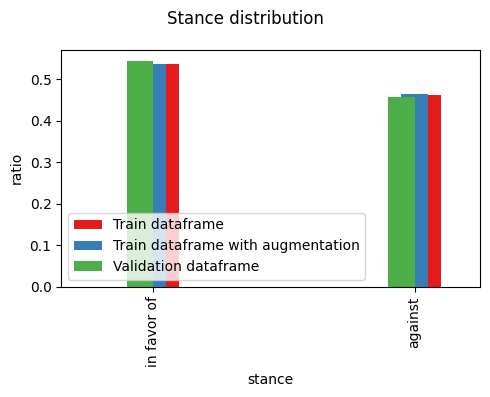

In [113]:
from src.datasets.dataset_analysis import plot_stance_distributions

plot_stance_distributions(
    [arguments_train_df_no_aug, arguments_train_df, arguments_val_df],
    ['Train dataframe', 'Train dataframe with augmentation',
     'Validation dataframe'])

Next, the distribution of the labels assigned to the argument instances is illustrated.

The distribution for the train and validation sets are similar, although it can be seen that the datasets are quite unbalanced.
More specifically, the labels with the lowest support are: *Simulation*, *Hedonism*, *Face* and *Conformity: Interpersonal* with a number of instnaces referring to them among $200$ and $400$ each.
On the other hand, the labels *Security: Personal*, *Security: Societal* and *Universalism: Concern* present the highest support with values over $1,300$.

***Note:*** *as previously specified, more than one label can be assigned to an instance.*

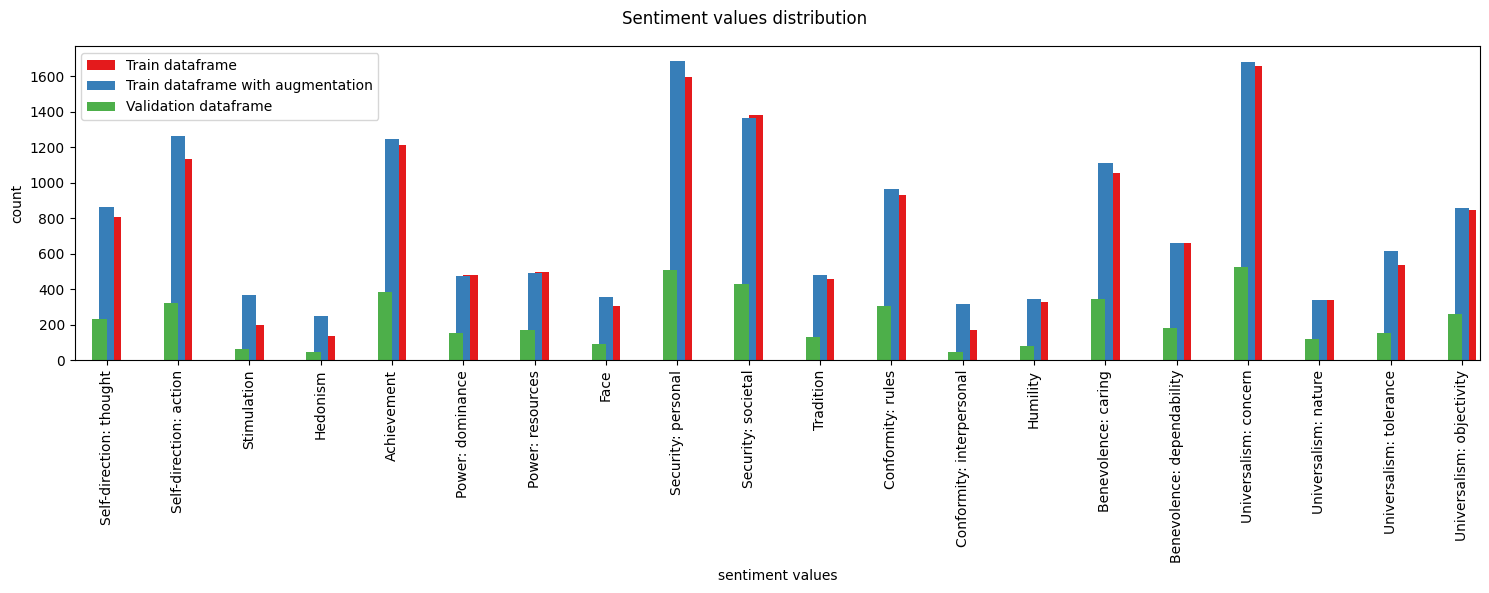

In [13]:
from src.datasets.dataset_analysis import plot_sentiment_distributions

plot_sentiment_distributions(
    [labels_train_df_no_aug, labels_train_df, labels_val_df],
    ['Train dataframe', 'Train dataframe with augmentation',
     'Validation dataframe'])

Then, the distribution of the sentence lenght of each argument instance on the train and validation are explored.

Once again, the datasets experience a similar behavior, as the general sentence length is between $100$ and $200$ words. The $99 \%$ of instances present a length of below $550$ words in both sets.

***Note:*** *The sentence length is considered by counting the number of word in the premise, the conclusion and by adding an extra word for the stance.*

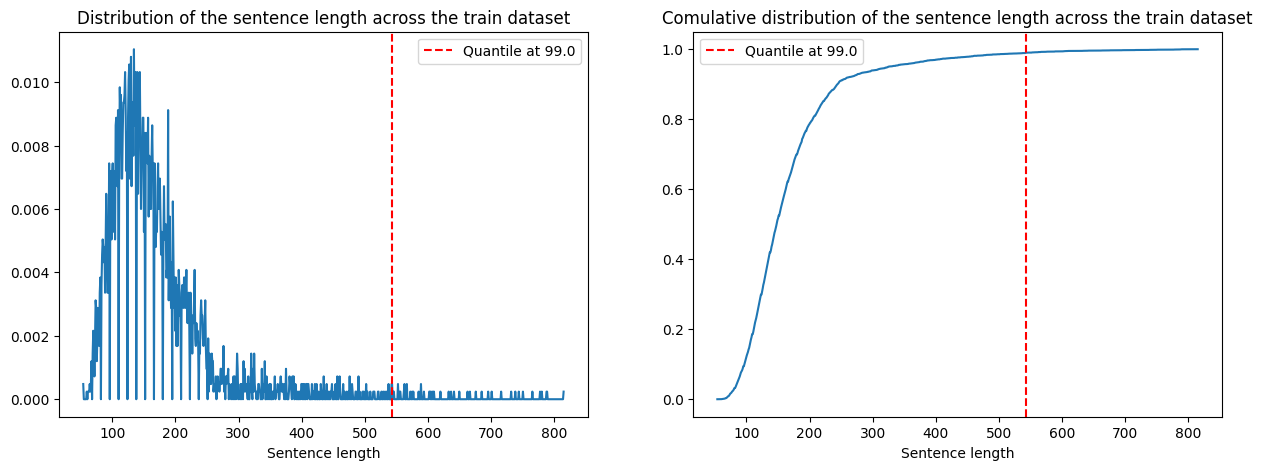

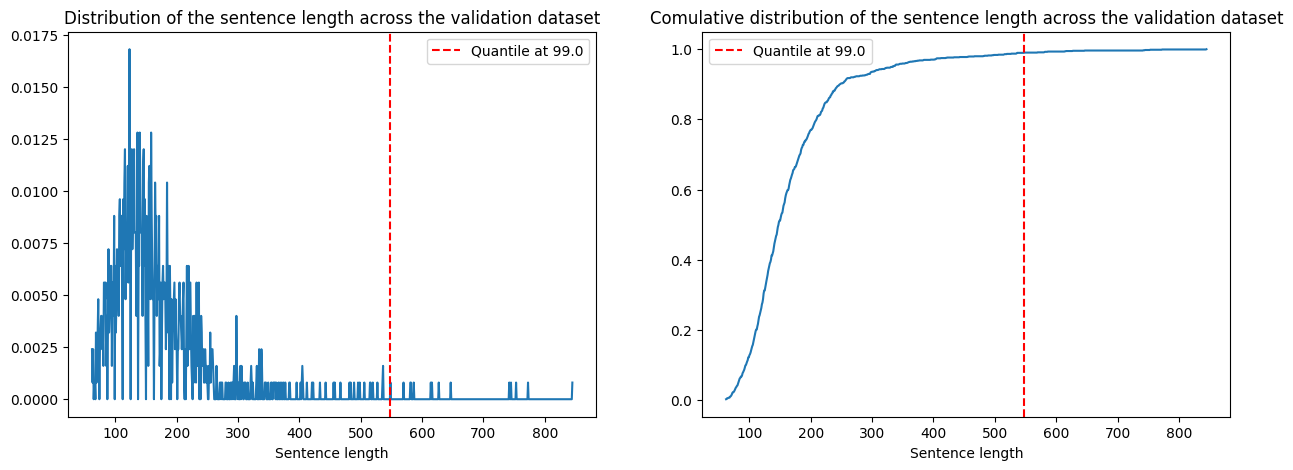

In [14]:
from src.datasets.dataset_analysis import plot_sequence_length_analysis

plot_sequence_length_analysis(arguments_train_df, df_name='train dataset',
                              percentile=.99)
plot_sequence_length_analysis(arguments_val_df, df_name='validation dataset',
                              percentile=.99)

Finally, an analysis of the most frequently used words is performed.

The following *word clouds*, give a general qualitative visualization of such analysis. Nonetheless, an actual and more scientific quantitative analysis is also performed showing the top $20$ most frequent words.

Once again, we can observe similarities among the train and validation sets, as they share many of the top terms.

It is interesting to observe that among these considered words terms related to political or social stance are mainly present, such as: *ban*, *legalize* or *abolish*, in accordance to the fact that the dataset concerns arguments regarding particular topics.

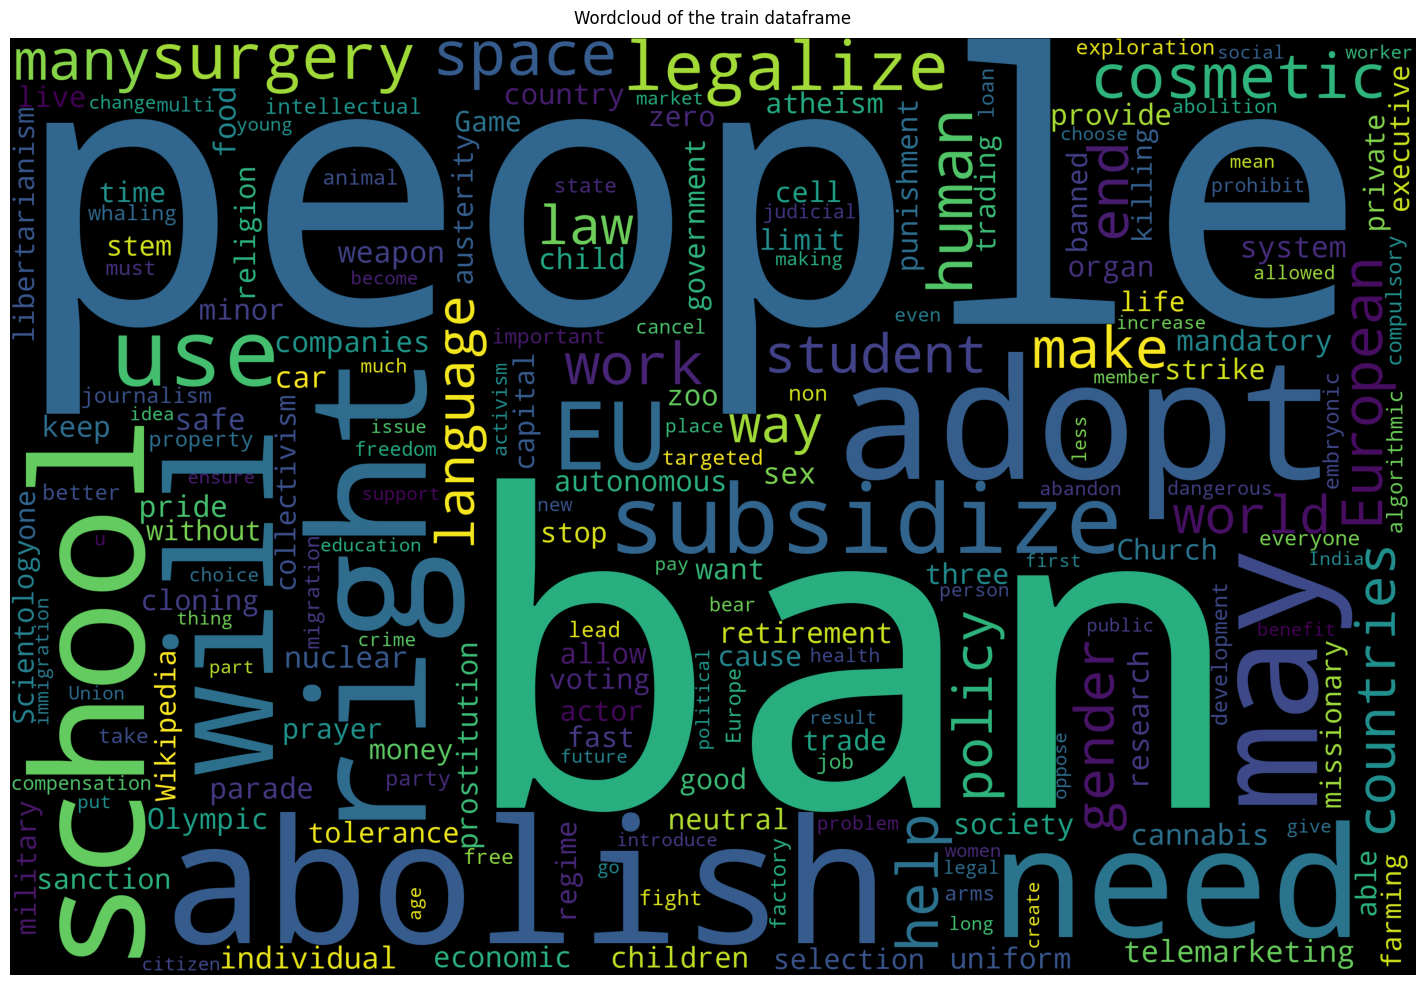

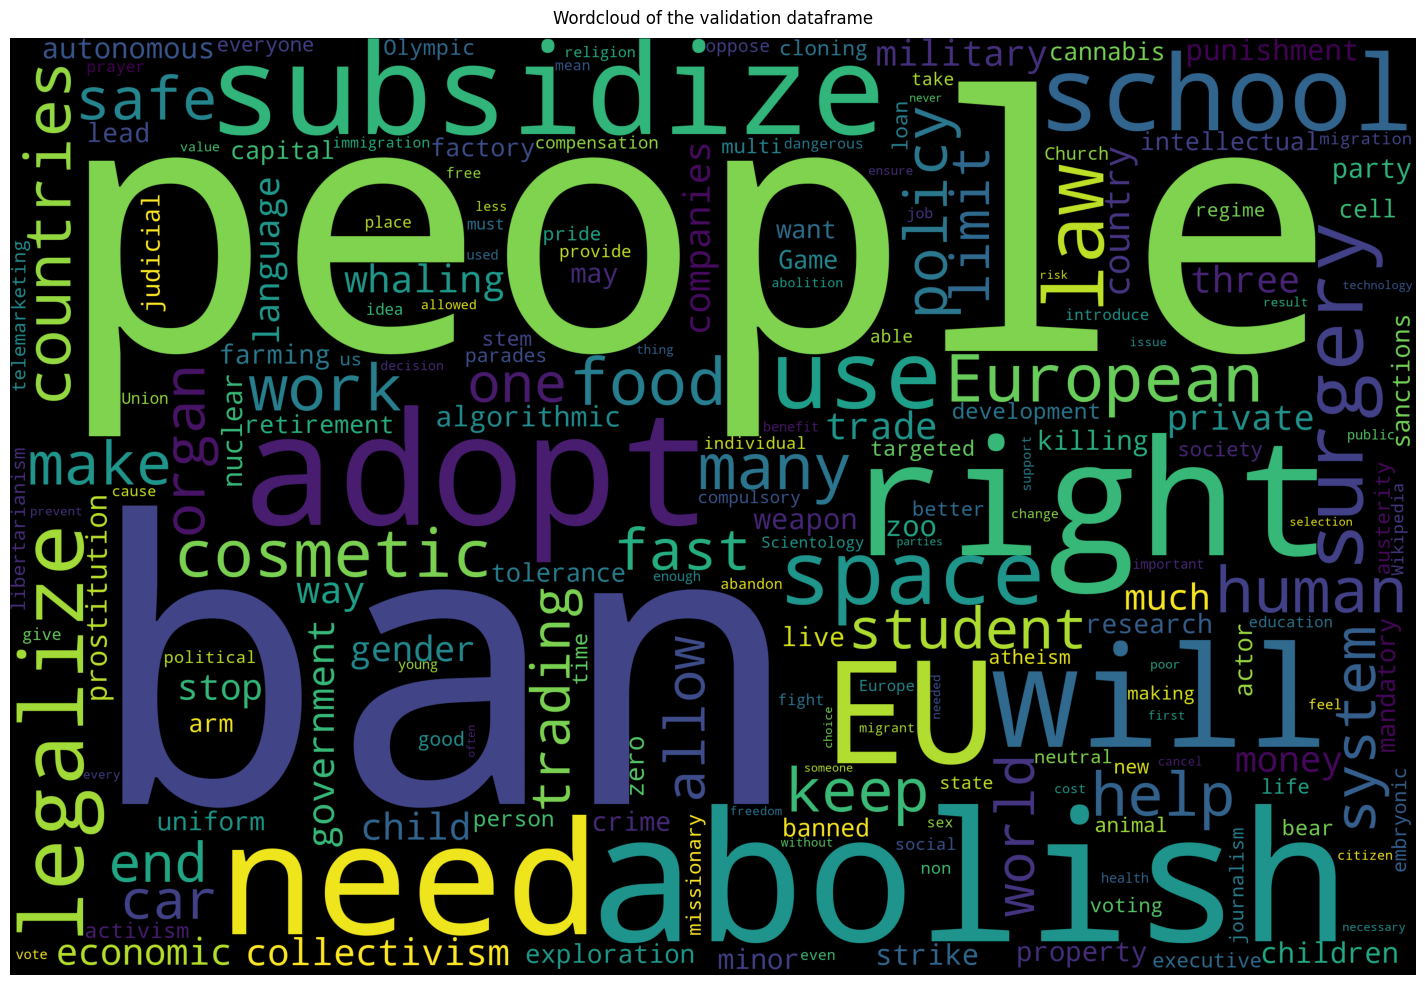

In [15]:
from src.datasets.dataset_analysis import plot_word_cloud

plot_word_cloud(arguments_train_df, title='Wordcloud of the train dataframe')
plot_word_cloud(arguments_val_df,
                title='Wordcloud of the validation dataframe')

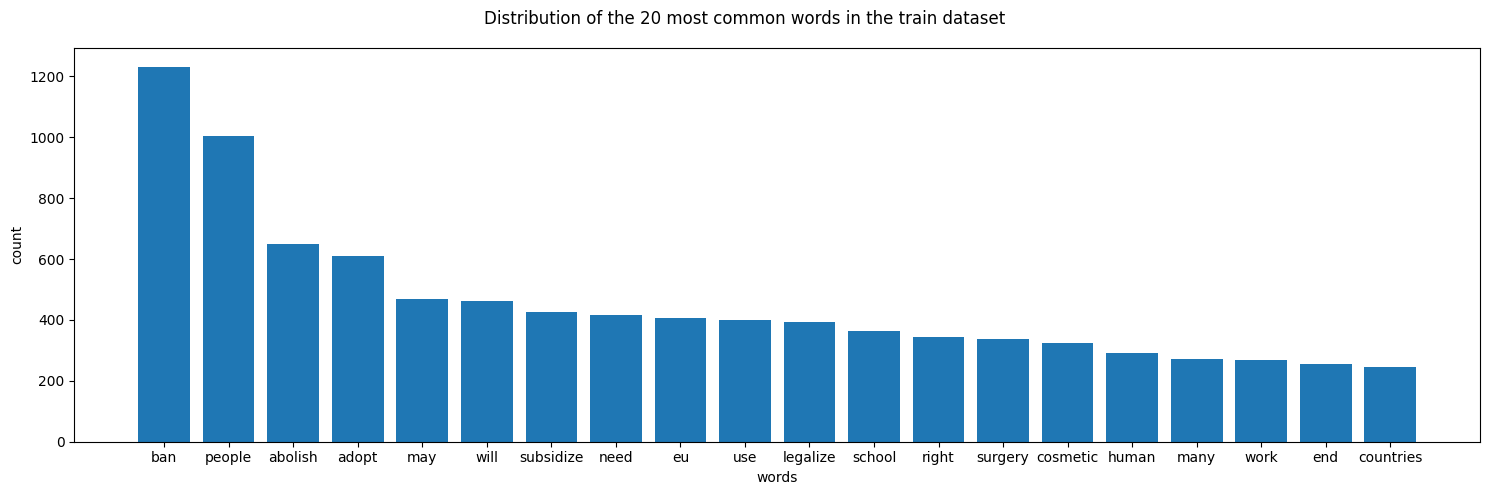

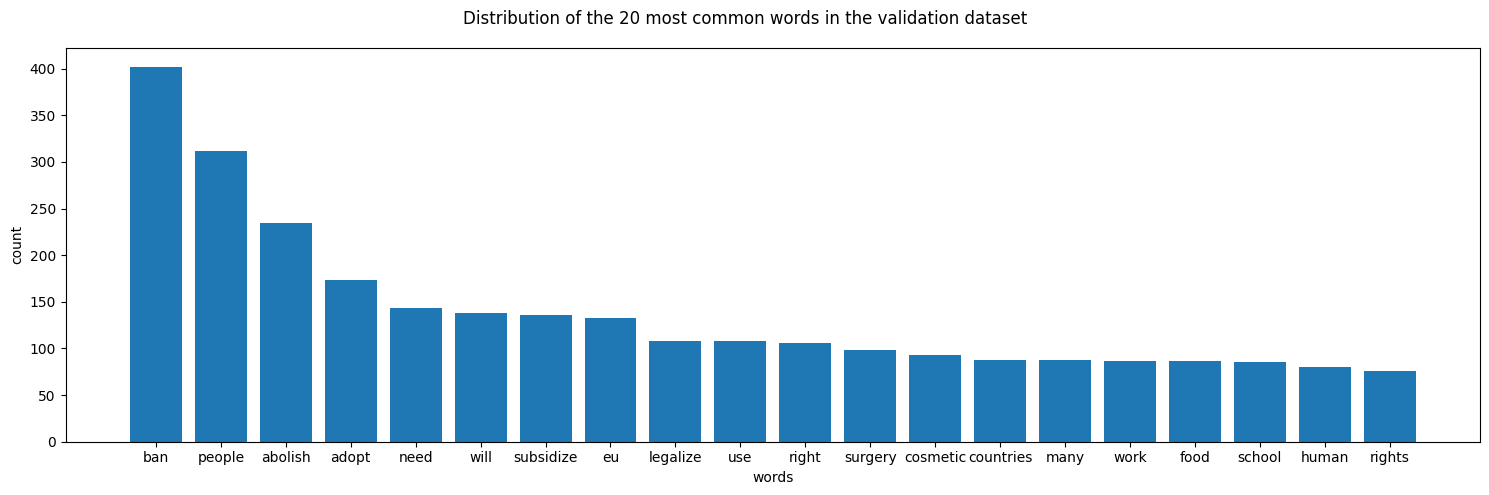

In [16]:
from src.datasets.dataset_analysis import plot_most_common_words_distribution

plot_most_common_words_distribution(
    arguments_train_df, n=20,
    title='Distribution of the 20 most common words in the train dataset')
plot_most_common_words_distribution(
    arguments_val_df, n=20,
    title='Distribution of the 20 most common words in the validation dataset')